TRABAJO CORREGIDO DE LA ENTREGA ANTERIOR

In [1]:
#Exercise 2
#Find the airports for your country here. The data is in a CSV file.
#Create projected layer of airports.
#Plot all the layers and airports on top.
import os
import geopandas as gpd
import pandas as pd
from google.colab import drive
from IPython.display import display
drive.mount('/content/drive')
shapefile_path = "/content/drive/My Drive/SHAPEFILE/contdv250kgw/contdv250kgw.shp"
mexico = gpd.read_file(shapefile_path)
airports=pd.read_csv("/content/drive/My Drive/SHAPEFILE/Aeropuertos/airports.csv")

Mounted at /content/drive


In [2]:
# Eliminar la primera flecha
if not airports.empty:
  airports.drop(index=0, inplace=True)
  airports.reset_index(drop=True, inplace=True)
airports.head()
print(airports)

           id    ident            type                       name  \
0      323361     00AA   small_airport       Aero B Ranch Airport   
1        6524     00AK   small_airport               Lowell Field   
2        6525     00AL   small_airport               Epps Airpark   
3      506791     00AN   small_airport       Katmai Lodge Airport   
4      322127     00AS   small_airport             Fulton Airport   
...       ...      ...             ...                        ...   
83095   32753     ZYYY  medium_airport    Shenyang Dongta Airport   
83096   46378  ZZ-0001        heliport            Sealand Helipad   
83097  307326  ZZ-0002   small_airport  Glorioso Islands Airstrip   
83098  346788  ZZ-0003   small_airport      Fainting Goat Airport   
83099  313629     ZZZZ   small_airport     Satsuma Iōjima Airport   

       latitude_deg  longitude_deg  elevation_ft continent iso_country  \
0         38.704022    -101.473911        3435.0       NaN          US   
1         59.947733    

In [3]:
if not airports.empty:
  print(airports.head(3))
  print(airports.tail(3))

       id ident           type                  name  latitude_deg  \
0  323361  00AA  small_airport  Aero B Ranch Airport     38.704022   
1    6524  00AK  small_airport          Lowell Field     59.947733   
2    6525  00AL  small_airport          Epps Airpark     34.864799   

   longitude_deg  elevation_ft continent iso_country iso_region  municipality  \
0    -101.473911        3435.0       NaN          US      US-KS         Leoti   
1    -151.692524         450.0       NaN          US      US-AK  Anchor Point   
2     -86.770302         820.0       NaN          US      US-AL       Harvest   

  scheduled_service icao_code iata_code gps_code local_code home_link  \
0                no       NaN       NaN     00AA       00AA       NaN   
1                no       NaN       NaN     00AK       00AK       NaN   
2                no       NaN       NaN     00AL       00AL       NaN   

  wikipedia_link keywords  
0            NaN      NaN  
1            NaN      NaN  
2            NaN 

In [4]:
airports.columns

Index(['id', 'ident', 'type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality', 'scheduled_service', 'icao_code', 'iata_code',
       'gps_code', 'local_code', 'home_link', 'wikipedia_link', 'keywords'],
      dtype='object')

In [5]:
keep=['type', 'name', 'latitude_deg', 'longitude_deg',
       'elevation_ft', 'continent', 'iso_country', 'iso_region',
       'municipality']
airports=airports.loc[:,keep]

airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83100 entries, 0 to 83099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           83100 non-null  object 
 1   name           83100 non-null  object 
 2   latitude_deg   83100 non-null  float64
 3   longitude_deg  83100 non-null  float64
 4   elevation_ft   68607 non-null  float64
 5   continent      43939 non-null  object 
 6   iso_country    82832 non-null  object 
 7   iso_region     83100 non-null  object 
 8   municipality   78409 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.7+ MB


In [6]:
numeros_airpt=['latitude_deg', 'longitude_deg', 'elevation_ft']
airports[numeros_airpt]=airports[numeros_airpt].apply(pd.to_numeric)

In [7]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83100 entries, 0 to 83099
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           83100 non-null  object 
 1   name           83100 non-null  object 
 2   latitude_deg   83100 non-null  float64
 3   longitude_deg  83100 non-null  float64
 4   elevation_ft   68607 non-null  float64
 5   continent      43939 non-null  object 
 6   iso_country    82832 non-null  object 
 7   iso_region     83100 non-null  object 
 8   municipality   78409 non-null  object 
dtypes: float64(3), object(6)
memory usage: 5.7+ MB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

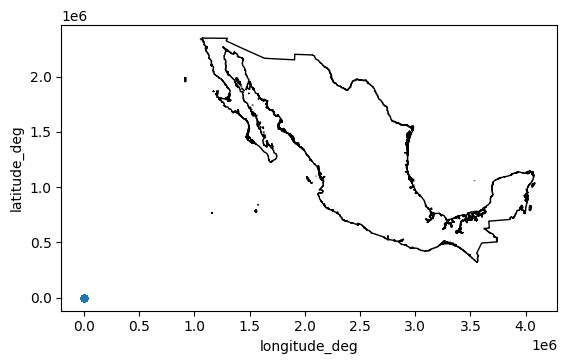

In [8]:
cities_mexico_6362=mexico.to_crs(6362)
base = cities_mexico_6362.plot(color='white', edgecolor='black')
airports.plot.scatter(x='longitude_deg', y='latitude_deg', ax=base)

<Axes: >

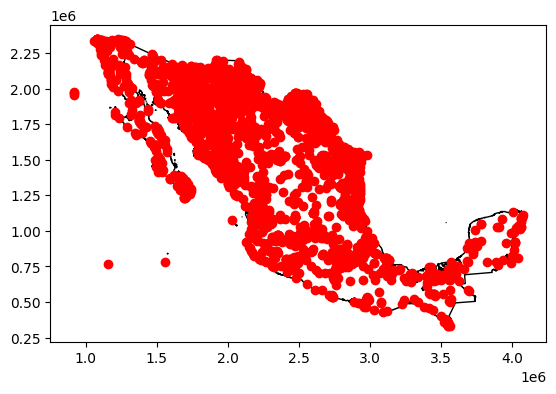

In [9]:
aeropuertos_mex=gpd.GeoDataFrame(airports, geometry=gpd.points_from_xy(airports.longitude_deg, airports.latitude_deg), crs=mexico.crs.to_epsg())
airports_projected_for_filter = aeropuertos_mex.to_crs(mexico.crs)
airports_in_mexico = gpd.sjoin(airports_projected_for_filter, mexico, predicate='within')
filtered_aeropuertos_mex = aeropuertos_mex.loc[airports_in_mexico.index]

base=mexico.to_crs(6362).plot(color='white', edgecolor='black')
filtered_aeropuertos_mex.to_crs(6362).plot(ax=base, color='red')

In [10]:
type(filtered_aeropuertos_mex), type(airports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

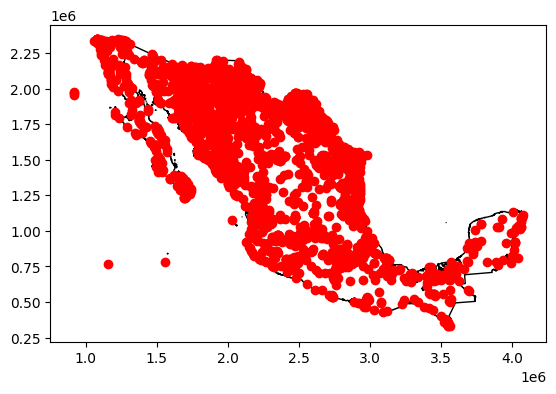

In [11]:
mexico6362=mexico.to_crs(6362)
base=mexico6362.plot(color='white', edgecolor='black')
aerop_6362=filtered_aeropuertos_mex.to_crs(6362)
aerop_6362.plot(ax=base, color='red')

A1

<Axes: >

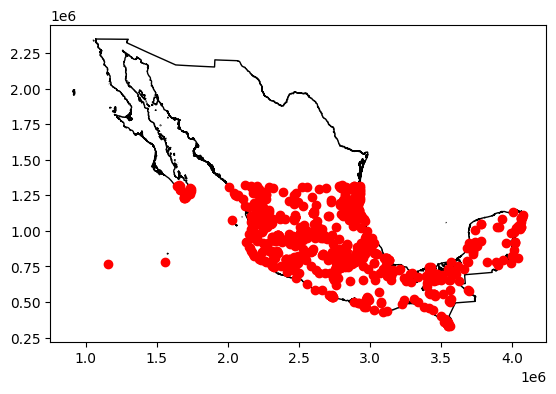

In [13]:
base=mexico6362.plot(color='white', edgecolor='black')#ponemos como base a México
centroid=mexico6362.centroid.iloc[0]#identificamos su centroide
aerop_6362.cx[:, :centroid.y].plot(ax=base, color='red')#seleccionamos los aeropuertos debajo del centroide y usamos a mexico como mapa base

PARTE 3 CONVER HULL

In [14]:
#Los aeropuertos de mexico
aerop_6362.head()

,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,geometry
12695,small_airport,Bahía de los Ángeles Airport,28.978600,-113.560997,34.0,NaN,MX,MX-BCN,Ensenada,POINT (1375535.371 1924272.966)
12784,small_airport,Muñoz Landing Airstrip,28.891952,-113.528724,33.0,NaN,MX,MX-BCN,San Quintín,POINT (1377897.203 1914457.219)
20625,small_airport,Ejidal de San Ignacio Airstrip,27.290600,-112.885100,575.0,NaN,MX,MX-BCS,Mulegé,POINT (1426992.291 1733008.88)
30555,heliport,Helipuerto Metropolitan,19.027753,-98.237375,6965.0,NaN,MX,MX-PUE,San Andres Cholula,POINT (2895112.617 786545.579)
43539,small_airport,Francisco Primo de Verdad y Ramos Airport,21.258983,-101.943758,6227.0,NaN,MX,MX-JAL,Lagos de Moreno,POINT (2505810.129 1027471.622)


In [20]:
# prompt: cambiar de nombre la columna type

aerop_6362.rename(columns={'type': 'kind'}, inplace=True)


In [21]:
aerop_6362.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 2658 entries, 12695 to 80080
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   kind           2658 non-null   object  
 1   name           2658 non-null   object  
 2   latitude_deg   2658 non-null   float64 
 3   longitude_deg  2658 non-null   float64 
 4   elevation_ft   2387 non-null   float64 
 5   continent      0 non-null      object  
 6   iso_country    2658 non-null   object  
 7   iso_region     2658 non-null   object  
 8   municipality   2634 non-null   object  
 9   geometry       2658 non-null   geometry
dtypes: float64(3), geometry(1), object(6)
memory usage: 293.0+ KB


In [22]:
#Identificamos el centroide de Mexico
centroidX,centroidY=mexico6362.centroid.x.values[0],mexico6362.centroid.y.values[0]
#Dividimos los aeropuertos respecto al centroid (en 4 partes)
Mexico_AirTopLeft=aerop_6362[aerop_6362.kind=='medium_airport'].cx[:centroidX,centroidY:]
Mexico_AirTopRight=aerop_6362[aerop_6362.kind=='medium_airport'].cx[centroidX:,centroidY:]
Mexico_AirBottomLeft=aerop_6362[aerop_6362.kind=='medium_airport'].cx[:centroidX,:centroidY]
Mexico_AirBottomRight=aerop_6362[aerop_6362.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

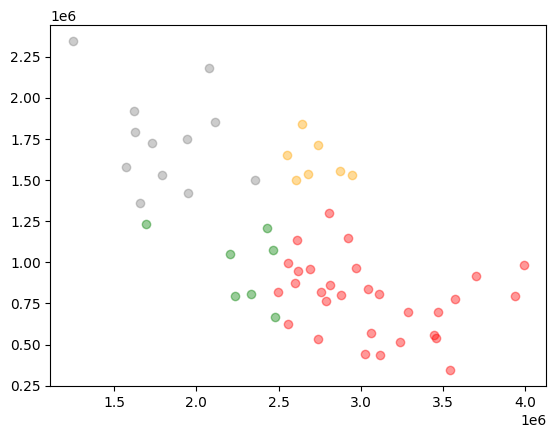

In [27]:
#Proyectamos las divisiones
base=Mexico_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Mexico_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Mexico_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Mexico_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

<Axes: >

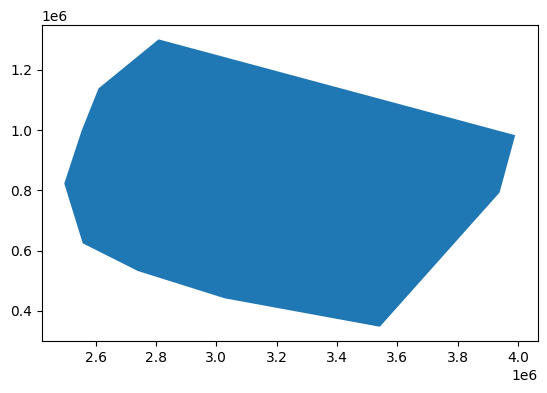

In [24]:
#Antes de hacer el convex hull tenemos que hacer dissolve
#elegimos Mexico_AirBottomRight
Mexico_AirBottomRight.dissolve().convex_hull.plot()

In [ ]:
#Se observa que se convirtio en un polygon

In [30]:
#Se convierte el hull a GDF
Mexico_AirBottomRight_hull=gpd.GeoDataFrame(index=[0],
                                    crs=Mexico_AirBottomRight.crs,
                                    geometry=[Mexico_AirBottomRight.dissolve().convex_hull.iloc[0]])
Mexico_AirBottomRight_hull['name']='medium airport hull'

<Axes: >

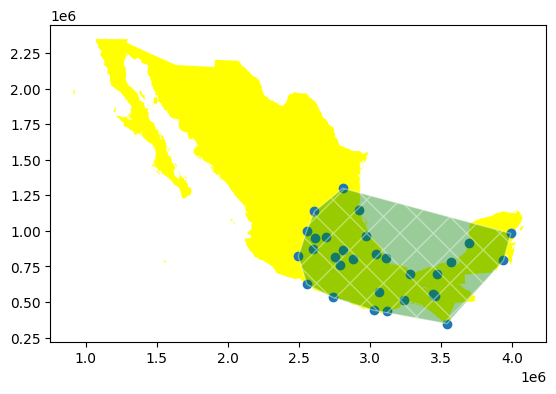

In [31]:
#mapear
base=mexico6362.plot(facecolor='yellow')
Mexico_AirBottomRight.plot(ax=base)
Mexico_AirBottomRight_hull.plot(ax=base,facecolor='green',
                                edgecolor='white',alpha=0.4,
                                hatch='X')